In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [100]:
#importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [101]:
print(dataset.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [102]:
X = dataset.iloc[1:, [2,3]].values
Y = dataset.iloc[1:, 4].values

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [104]:
sc = StandardScaler()

In [105]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [106]:
classifier = LogisticRegression()

In [107]:
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
Y_pred = classifier.predict(X_test)

In [109]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        70
           1       0.76      0.73      0.75        30

   micro avg       0.85      0.85      0.85       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.85      0.85      0.85       100



In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[63  7]
 [ 8 22]]


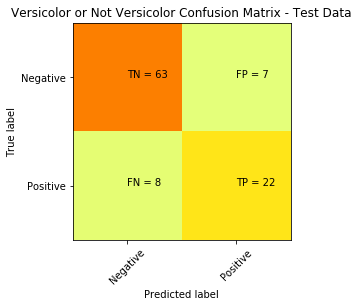

In [112]:
#Source http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


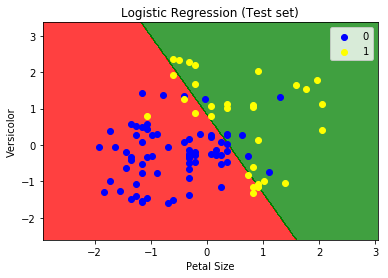

In [113]:
from matplotlib.colors import ListedColormap
plt.clf()
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Petal Size')
plt.ylabel('Versicolor')
plt.legend()
plt.show()

In [114]:
print(X_train)


[[-0.12388443 -0.51230757]
 [ 1.96028899  0.40088067]
 [ 1.01293743  2.10942641]
 [-0.59756021  0.90166132]
 [ 0.91820228  2.10942641]
 [ 1.39187806  1.01949206]
 [-1.73438208 -0.60068062]
 [-0.02914928 -0.2471884 ]
 [ 0.16032103 -0.65959599]
 [ 0.34979134  0.10630382]
 [-0.97650084  1.57918808]
 [-1.54491177  0.3419653 ]
 [ 0.4445265   1.25515354]
 [ 0.91820228 -0.83634211]
 [ 1.96028899 -1.18983433]
 [ 0.16032103  0.25359225]
 [-0.31335475  0.22413456]
 [-1.35544146 -1.10146127]
 [ 1.39187806  2.16834178]
 [ 0.82346712 -0.54176525]
 [-0.88176568 -1.21929201]
 [-0.31335475 -0.27664609]
 [ 0.72873197  0.28304993]
 [ 1.01293743  0.48925373]
 [-0.31335475  0.28304993]
 [-0.78703052  0.57762678]
 [ 0.63399681 -1.39603812]
 [-0.12388443  2.25671484]
 [-0.02914928  1.28461123]
 [-0.88176568 -0.65959599]
 [ 0.25505619 -0.71851136]
 [ 2.05502415 -0.80688442]
 [-1.45017661  0.37142299]
 [-0.02914928 -0.30610377]
 [ 1.96028899  2.16834178]
 [-0.59756021  0.48925373]
 [-0.02914928 -0.57122294]
 

In [115]:
print(Y_train)

[0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1
 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0
 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 1 0]


In [116]:
print(X_test)

[[-1.63964692 -0.04098461]
 [ 0.34979134  0.01793076]
 [-0.21861959 -0.4533922 ]
 [-1.73438208 -0.98363053]
 [ 1.77081868  1.54973039]
 [-1.2607063   0.51871141]
 [ 0.72873197 -0.30610377]
 [ 1.58134837  1.63810345]
 [-0.31335475 -0.30610377]
 [ 2.05502415  1.1373228 ]
 [-1.16597115  0.07684614]
 [-1.45017661 -0.18827303]
 [ 0.34979134  0.31250762]
 [ 0.06558588  0.22413456]
 [-0.59756021 -1.51386886]
 [-1.07123599 -1.45495349]
 [-0.31335475 -0.36501914]
 [-1.92385239 -0.04098461]
 [ 1.2971429   1.31406891]
 [-0.31335475 -0.89525748]
 [-1.2607063  -1.39603812]
 [ 0.16032103 -0.2471884 ]
 [ 0.06558588 -0.2471884 ]
 [ 0.82346712  1.04894975]
 [-0.31335475 -0.65959599]
 [ 0.06558588  0.28304993]
 [-1.16597115 -1.54332655]
 [ 0.82346712 -1.30766507]
 [ 0.91820228  2.02105336]
 [-0.50282506  2.34508789]
 [-0.4080899   1.3435266 ]
 [ 0.16032103 -0.27664609]
 [-0.12388443  0.31250762]
 [-0.21861959  1.66756113]
 [-1.35544146 -1.48441118]
 [-1.54491177 -1.2487497 ]
 [-0.78703052  1.37298428]
 

In [117]:
print(Y_test)

[0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1
 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1]


In [118]:
print(Y_pred)

[0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1]
